# Import Lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

# Read the dataset (tab, csv, xlsx, txt, inbuilt dataset)

In [2]:
add=pd.read_excel("Admission.xlsx")
add.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


# Summarize Data

# What are the number of rows and no. of cols & types of variables.

In [3]:
add.shape

(391, 19)

# Calculate statistical summary for numerical variables

In [4]:
add.describe()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,196.000000,64.652353,63.795294,62.983606,0.478261,54.934962,61.667698,60.539642,68.363171,64.378517,219078.260870
std,113.016223,10.960426,11.417726,8.916152,0.667112,31.168264,5.854399,8.824084,7.145095,9.582834,138311.647036
min,1.000000,37.000000,40.000000,35.000000,0.000000,0.000000,50.830000,50.000000,50.000000,50.000000,0.000000
25%,98.500000,56.000000,54.000000,57.525000,0.000000,41.190000,57.195000,53.000000,64.000000,57.000000,172800.000000
50%,196.000000,64.500000,63.000000,63.000000,0.000000,62.000000,61.010000,58.000000,69.000000,63.000000,240000.000000
75%,293.500000,74.000000,72.000000,69.000000,1.000000,78.000000,66.020000,67.000000,74.000000,72.500000,300000.000000
max,391.000000,87.200000,94.700000,89.000000,3.000000,98.690000,77.890000,88.000000,87.000000,96.000000,940000.000000


# Do an appropriate plot and tell which category of bedroom are the most commonly found in the city according to our data.

<Axes: ylabel='Course_Degree'>

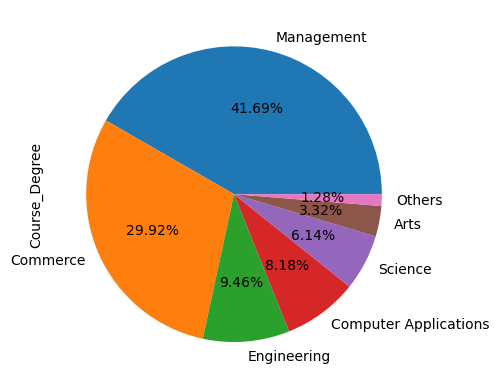

In [5]:
add["Course_Degree"].value_counts().plot(kind="pie",autopct="%.2f%%")

Most of the students are from the Management course degree. which is approx 41.65% of total data.

# Correlation 


In [6]:
corr_matrix=add.corr()

In [7]:
corr_matrix["Salary"].sort_values(ascending=False)

Salary                 1.000000
Percent_SSC            0.205134
Percent_MBA            0.176594
Marks_Projectwork      0.155142
Percentile_ET          0.150589
Experience_Yrs         0.142547
Marks_BOCA             0.134112
Marks_Communication    0.128061
Percent_Degree         0.098528
Percent_HSC            0.095793
SlNo                  -0.084017
Name: Salary, dtype: float64

<Axes: >

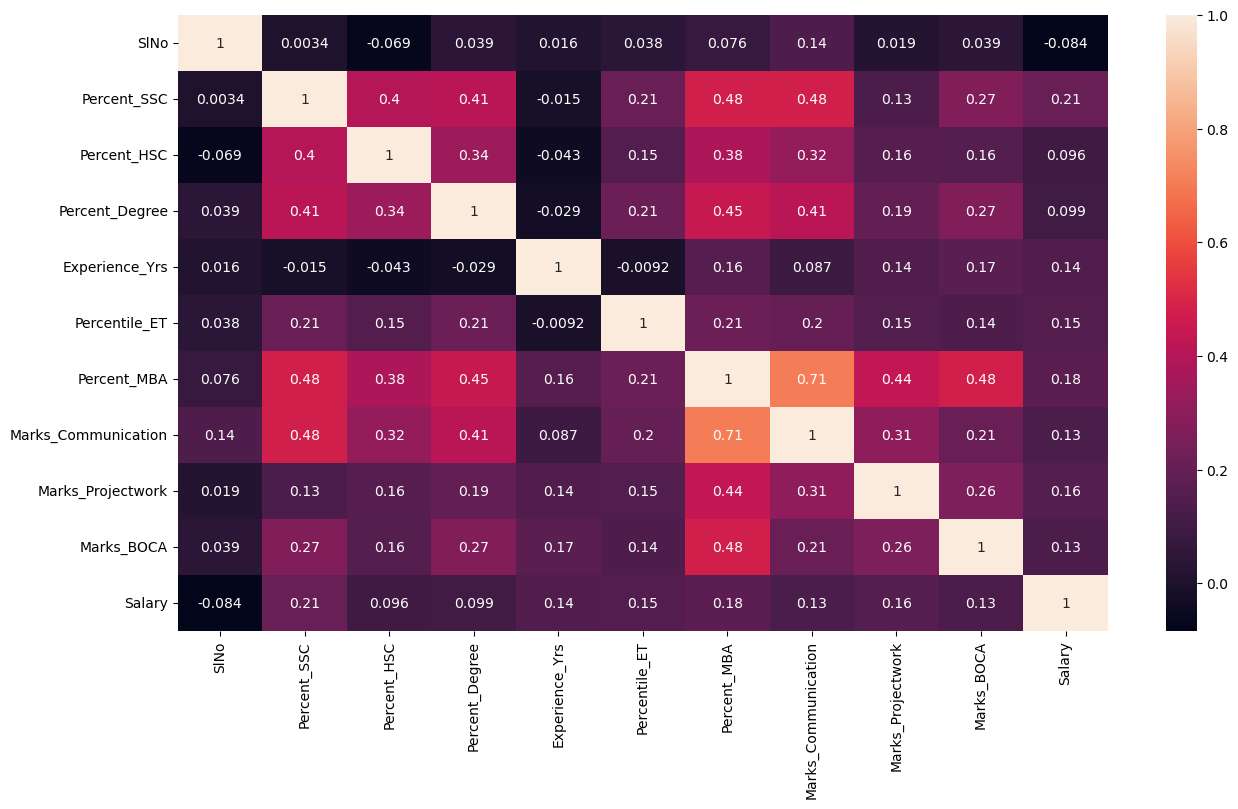

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(add.corr(),annot=True)

The is high correlation between independent feature. So lets reduce the columns having high correlation.

In [9]:
def correlation(dataset,thres):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thres:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [10]:
correlation(add,0.7)

{'Marks_Communication'}

# Delecting High correlated columns.

In [11]:
add.drop("Marks_Communication",axis=1,inplace=True)

# Is the target variable normally distributed? If not, rectify it.

<Axes: xlabel='Salary', ylabel='Density'>

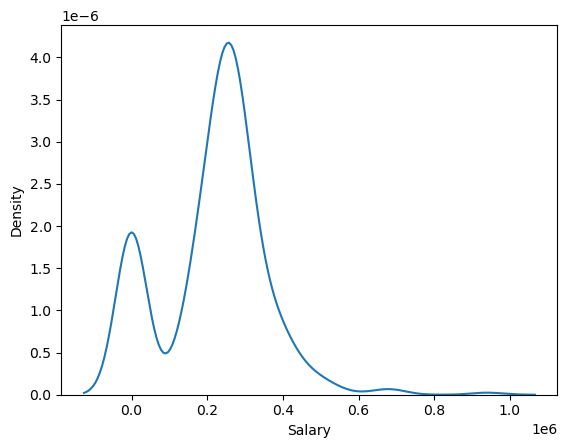

In [12]:
sns.kdeplot(add["Salary"])

The target column from the above graph I can say, it is not normally distributed but let future check with the help or shapiro test.

In [13]:
from scipy import stats

In [14]:
stat,p_value=stats.shapiro(add["Salary"])
print(round(p_value,4))

0.0


P value is less than 0.05 so data is not normally distributed.

In [15]:
add["Salary"]=np.sqrt(add["Salary"])

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
add["Salary"]=ss.fit_transform(add["Salary"].values.reshape(-1,1))

<Axes: xlabel='Salary', ylabel='Density'>

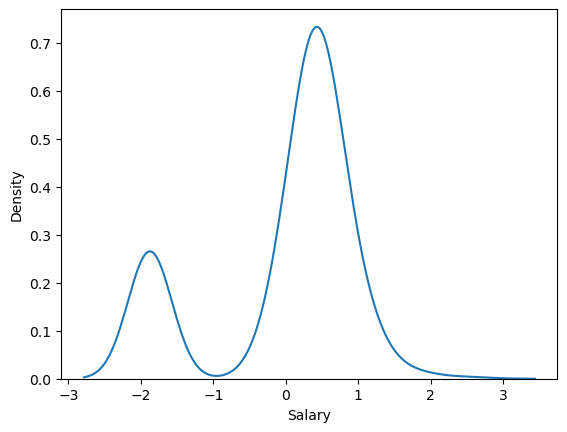

In [17]:
sns.kdeplot(add["Salary"])

Here the target column is nearly normally distributed after using the transformation and the scalig of the "Salary" column.

# Do variables have missing/null values?

In [18]:
add.isnull().sum()

SlNo                   0
Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test         67
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

A category column has some null values so i use mode imputation.

In [19]:
add["Entrance_Test"].value_counts()

MAT      265
K-MAT     24
CAT       22
PGCET      8
GCET       2
G-MAT      1
XAT        1
G-SAT      1
Name: Entrance_Test, dtype: int64

In [20]:
add["Entrance_Test"].fillna("MAT",inplace=True)

# Does the data have outliers?

In [21]:
data=add.dtypes
int_col=list(data[data!="object"].index)

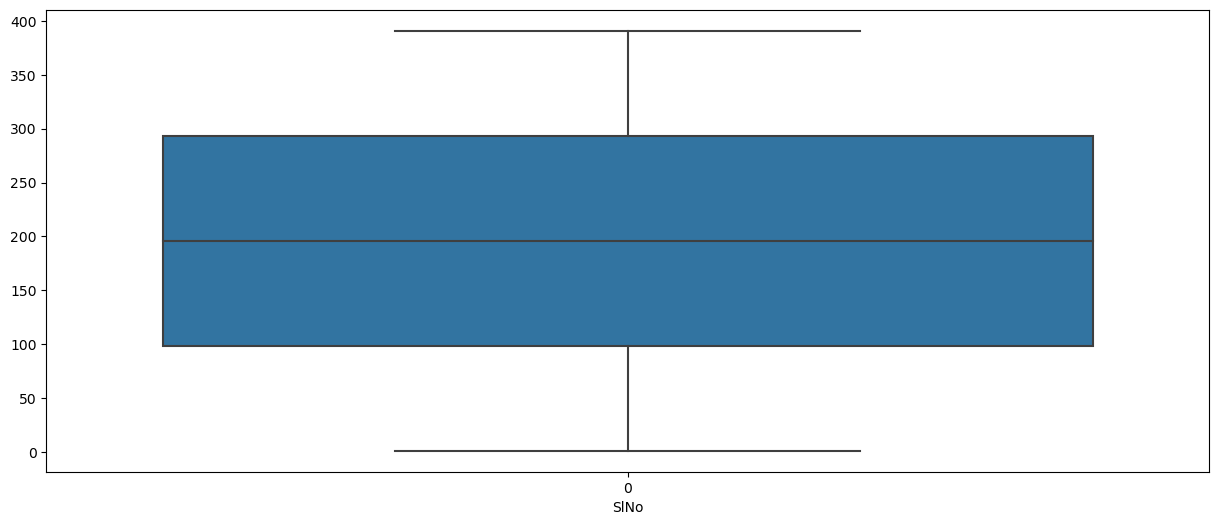

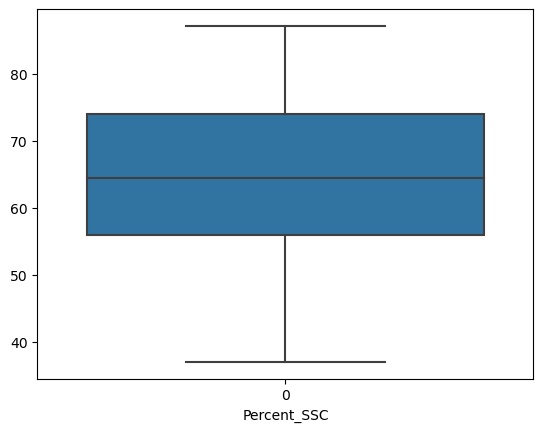

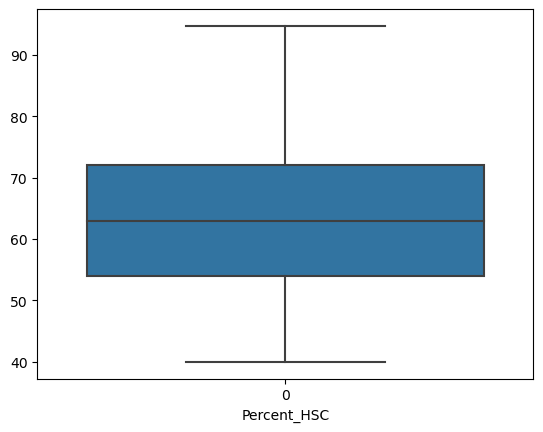

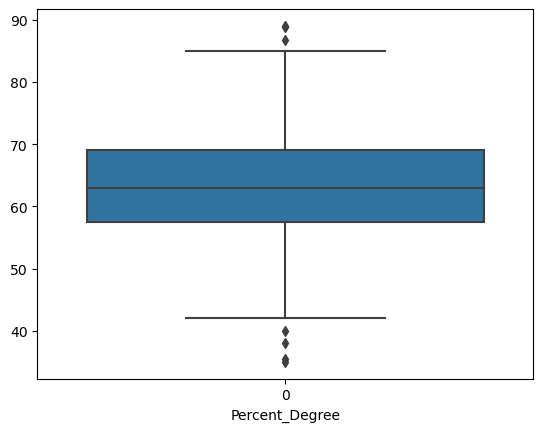

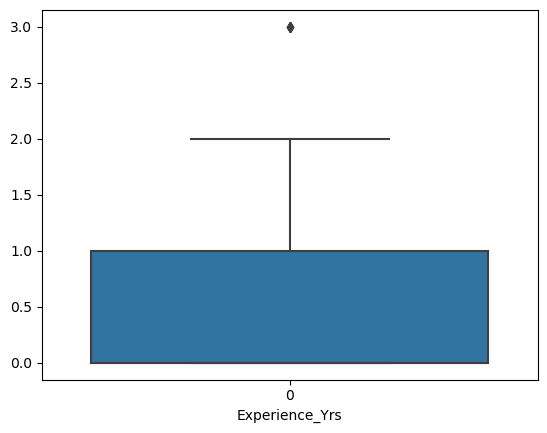

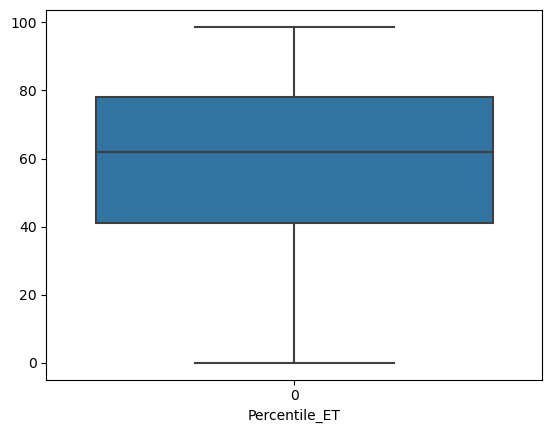

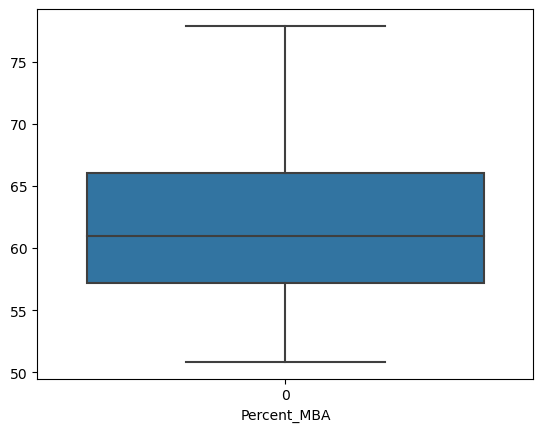

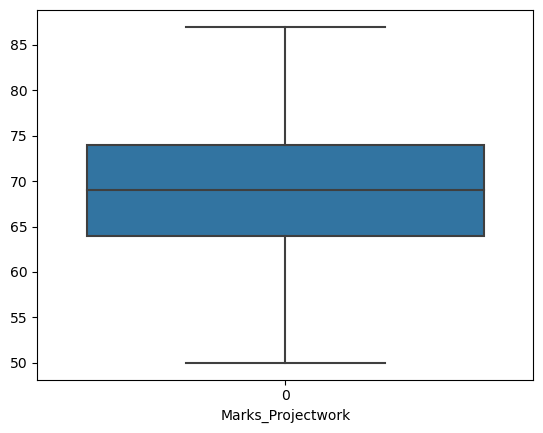

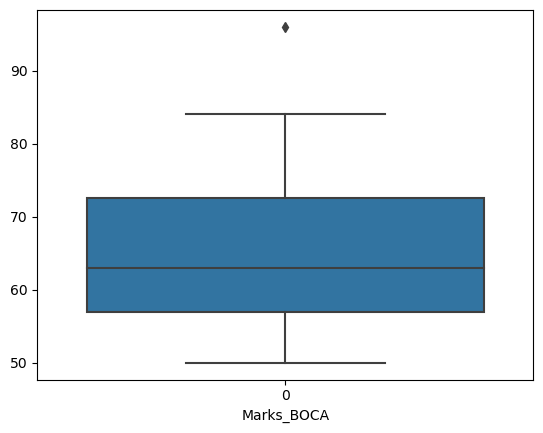

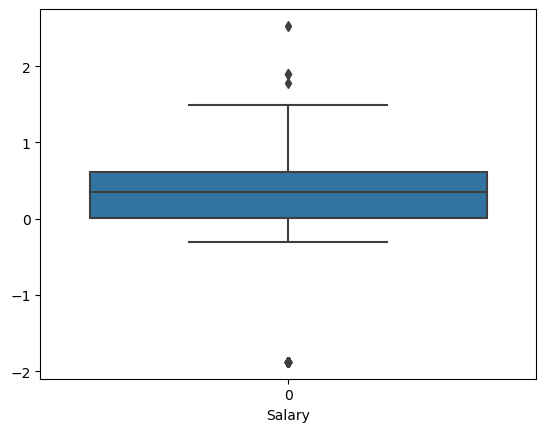

In [22]:
plt.figure(figsize=(15,6))
for i in int_col:
    sns.boxplot(add[i])
    plt.xlabel(i)
    plt.show()

There is some outlier in some feature but number is very less so, I can ignore treating the outlier cause it might change my original data.

# Encoding

In [23]:
add.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,65,74,Placed,0.484055
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,70,75,Placed,0.155235
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,MAT,0.0,52.91,Marketing & Finance,61,59,Placed,0.349090
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,66,62,Placed,0.394970
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,65,67,Placed,0.051007


In [24]:
datat=add.dtypes
obj=list(datat[datat=="object"].index)

In [25]:
add=pd.get_dummies(add,columns=obj,drop_first=True)

In [26]:
add.head()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Projectwork,Marks_BOCA,Salary,...,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
0,1,62.00,88.00,52.00,0,55.0,58.80,65,74,0.484055,...,0,0,0,0,1,0,0,1,0,1
1,2,76.33,75.33,75.48,1,86.5,66.28,70,75,0.155235,...,0,0,0,0,1,0,0,0,0,1
2,3,72.00,78.00,66.63,0,0.0,52.91,61,59,0.349090,...,0,0,0,0,1,0,0,0,0,1
3,4,60.00,63.00,58.00,0,75.0,57.80,66,62,0.394970,...,0,0,0,0,1,0,0,0,0,1
4,5,61.00,55.00,54.00,1,66.0,59.43,65,67,0.051007,...,0,0,0,0,1,0,0,1,0,1


# Are both train and test representative of the overall data? How would you ascertain this statistically?

In [27]:
X=add.drop(["Salary"],axis=1)
y=add["Salary"]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
X_train.head()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Projectwork,Marks_BOCA,Gender_M,...,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
289,290,64.96,45.16,65.26,1,54.48,65.48,75,61,1,...,0,0,0,0,1,0,0,1,0,0
305,306,48.00,63.00,59.70,0,44.20,62.00,69,75,1,...,0,0,0,0,1,0,0,0,0,1
85,86,46.00,62.00,58.00,0,0.00,57.83,78,65,0,...,0,0,0,0,1,0,0,0,0,1
58,59,70.00,75.00,60.00,0,77.00,51.29,56,52,1,...,0,0,0,0,1,0,0,0,0,0
353,354,63.00,58.00,69.00,0,63.00,69.12,77,78,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
X_train.shape

(273, 32)

In [31]:
y_train.shape

(273,)

# Fit a base model. Please write your key observation

In [32]:
import statsmodels.api as sm

In [33]:
model=sm.OLS(y,X)
fit=model.fit()

In [34]:
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              87.91
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                   2.21e-149
Time:                        23:24:01   Log-Likelihood:                         -128.84
No. Observations:                 391   AIC:                                      321.7
Df Residuals:                     359   BIC:                                      448.7
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [35]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [36]:
model_1= sm.OLS(y_train, X_train).fit()

In [37]:
y_pred=model_1.predict(X_test)

In [38]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              64.17
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                    4.11e-99
Time:                        23:24:02   Log-Likelihood:                         -74.580
No. Observations:                 273   AIC:                                      211.2
Df Residuals:                     242   BIC:                                      323.1
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
SlNo                                -7.204e-05      0.000     -0.361      0.718      -0.000       0.000
Percent_SSC                             0.0008      0.003      0.310      0.757      -0.004       0.006
Percent_HSC                            -0.0038      0.002     -1.547      0.123      -0.009       0.001
Percent_Degree                       1.094e-06      0.003      0.000      1.000      -0.006       0.006
Experience_Yrs                          0.1129      0.034      3.332      0.001       0.046       0.180
Percentile_ET                           0.0011      0.001      1.463      0.145      -0.000       0.002
Percent_MBA                            -0.0065      0.005     -1.328      0.185      -0.016       0.003
Marks_Projectwork                      -0.0093      0.003     -2.921      0.004      -0.016      -0.003
Marks_BOCA                             -0.0008      0.002     -0.330      0.742      -0.006       0.004
Gender_M                                0.0138      0.046      0.298      0.766      -0.077       0.105
Board_SSC_ICSE                         -0.1886      0.084     -2.259      0.025      -0.353      -0.024
Board_SSC_Others                       -0.1273      0.069     -1.838      0.067      -0.264       0.009
Board_HSC_ISC                           0.1067      0.101      1.052      0.294      -0.093       0.306
Board_HSC_Others                        0.0015      0.069      0.022      0.983      -0.135       0.138
Stream_HSC_Commerce                     0.1552      0.110      1.409      0.160      -0.062       0.372
Stream_HSC_Science                      0.0898      0.119      0.752      0.453      -0.145       0.325
Course_Degree_Commerce                 -0.3329      0.141     -2.362      0.019      -0.611      -0.055
Course_Degree_Computer Applications    -0.2758      0.155     -1.780      0.076      -0.581       0.029
Course_Degree_Engineering              -0.1367      0.148     -0.920      0.358      -0.429       0.156
Course_Degree_Management               -0.3860      0.134     -2.880      0.004      -0.650      -0.122
Course_Degree_Others                   -0.4785      0.218     -2.199      0.029      -0.907      -0.050
Course_Degree_Science                  -0.3534      0.155     -2.287      0.023      -0.658      -0.049
Entrance_Test_G-MAT                    -0.0367      0.356     -0.103      0.918      -0.738       0.664
Entrance_Test_G-SAT                    -0.4037      0.366     -1.103      0.271      -1.124       0.317
Entrance_Test_GCET                     -0.3768      0.265     -1.421      0.157      -0.899       0.146
Entrance_Test_K-MAT                    -0.0911      0.113     -0.807    

Durbin-Watson:	1.966
Cond. No.	1.22e+16
From these value our model having problem of multi-colinearity because Cond number is greater than 1000.
but there is no autocorrelation because Durbin Waston is nearly equal to 2.

In [39]:
from statsmodels.tools.eval_measures import rmse

In [40]:
model_1_rmse=rmse(y_test,y_pred)
model_1_rsquare=model_1.rsquared
model_1_adj_rsquare=model_1.rsquared_adj

In [41]:
model_value=pd.Series({"Model_Name":"Base Model","R-Squared":model_1_rsquare,"Adj. R-Squared":model_1_adj_rsquare,"RMSE":model_1_rmse})
score_card=score_card.append(model_value,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Base Model,0.891542,0.877648,0.395705


# Assumption of linear regression model

# Autocorrelation

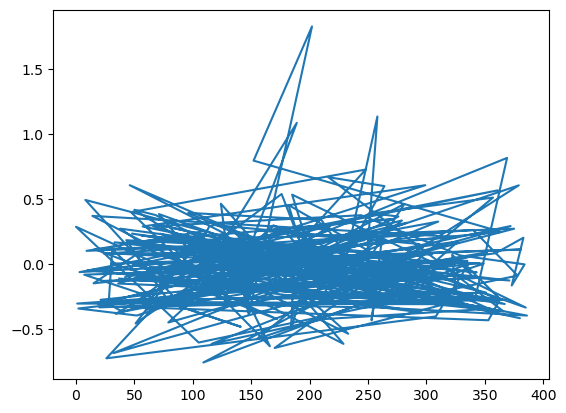

In [42]:
plt.plot(model_1.resid)

There is no autocorrelation in residual

# Homocresdity

In [43]:
residual=y_test-y_pred

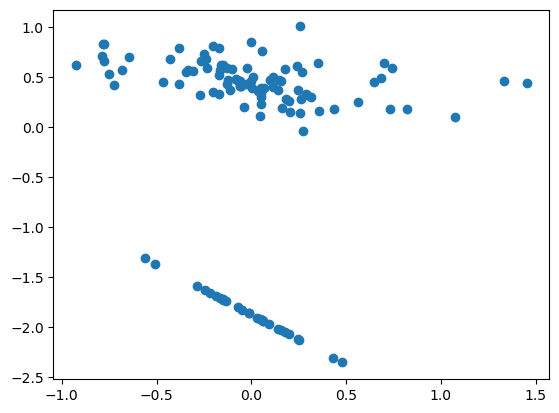

In [44]:
plt.scatter(residual,y_pred)

From the above graph I can say Homoscresdity is follow.

# linearity of residual

In [45]:
X_test.shape

(118, 32)

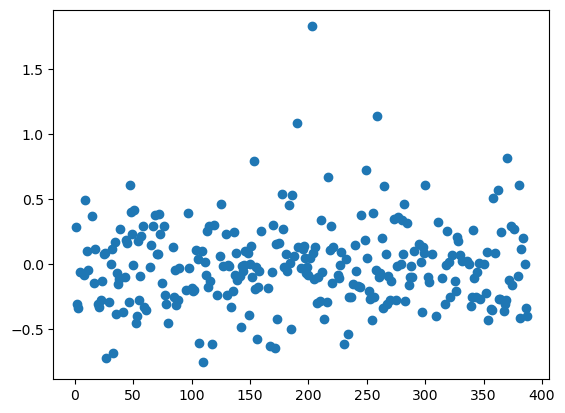

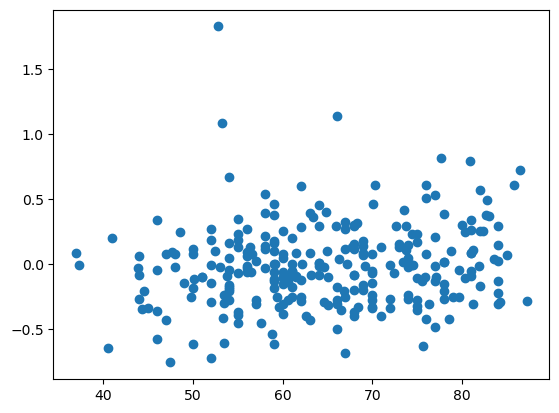

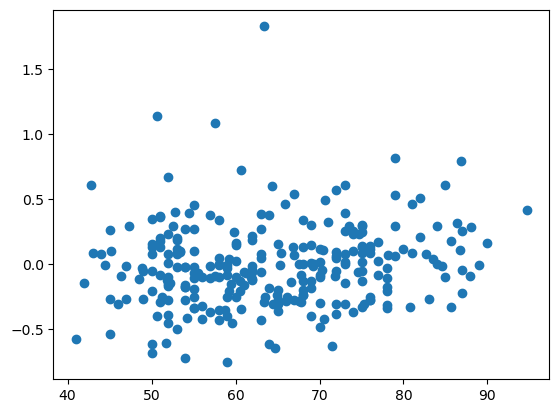

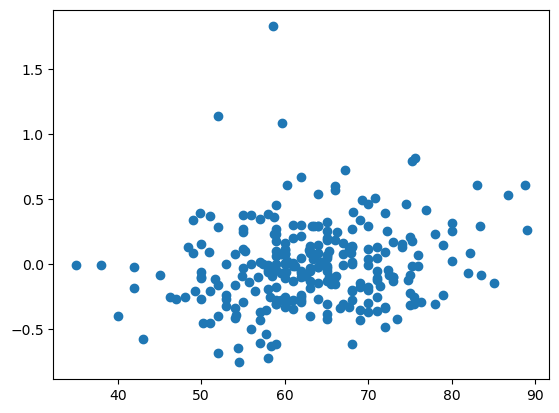

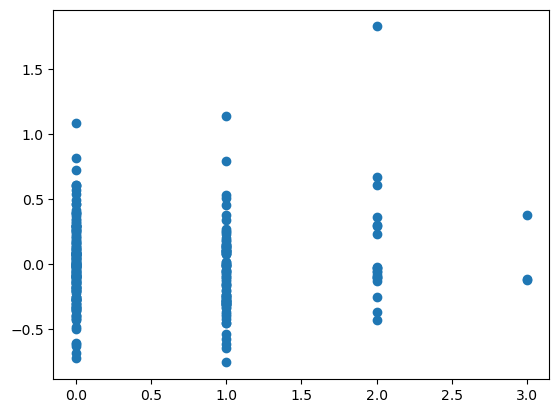

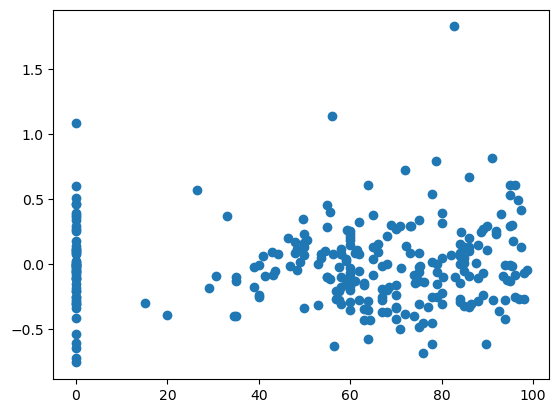

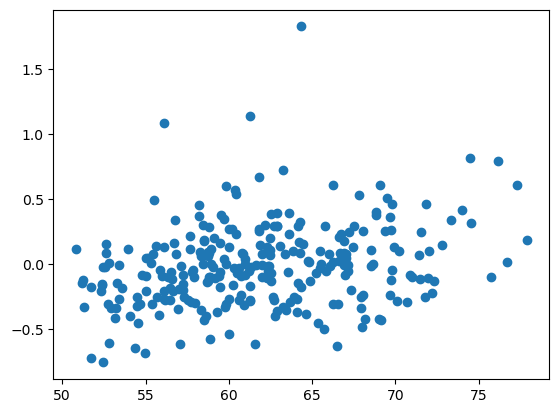

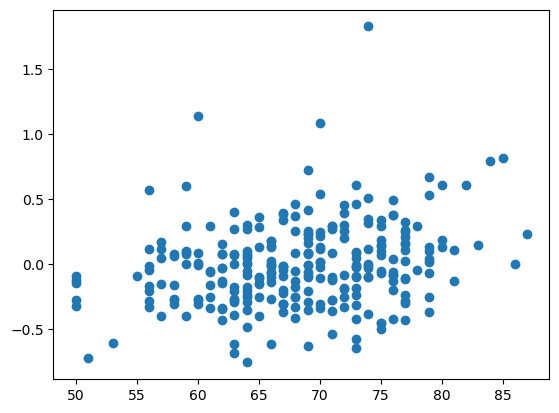

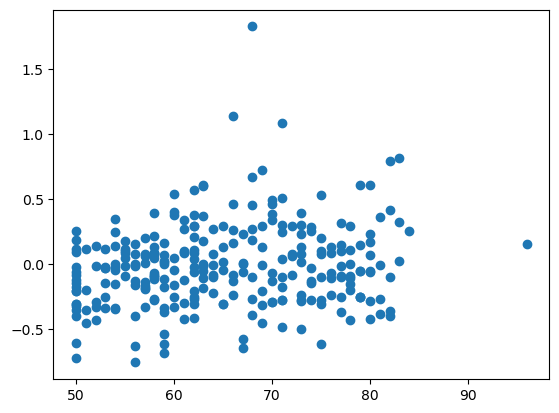

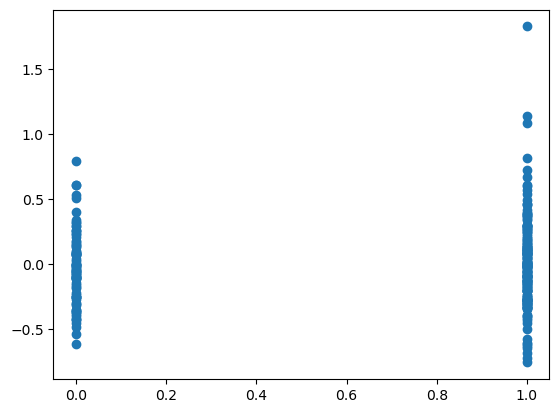

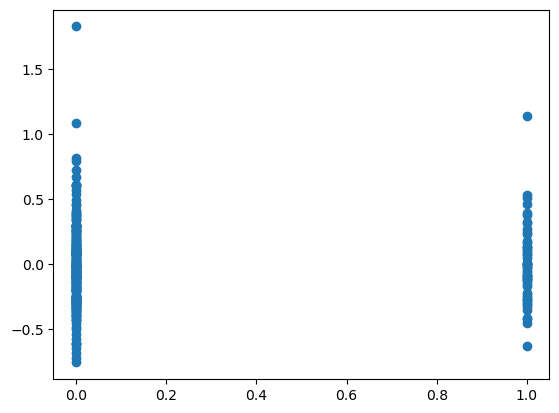

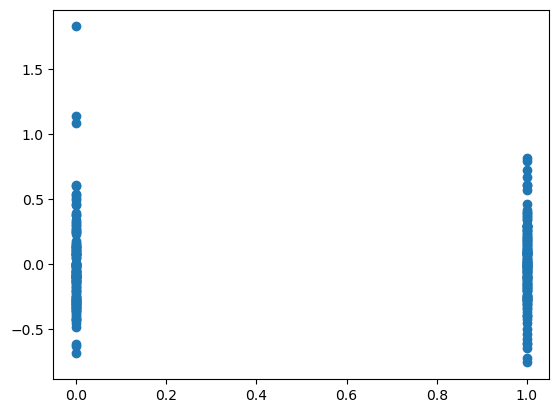

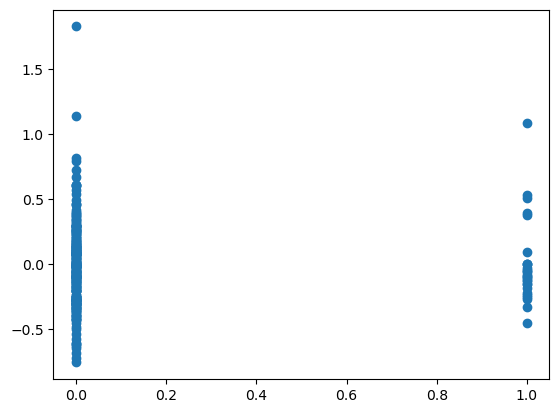

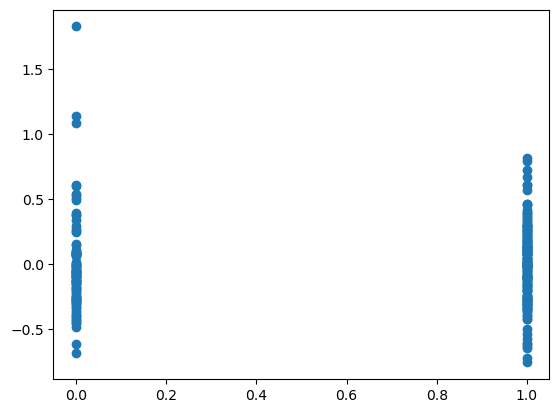

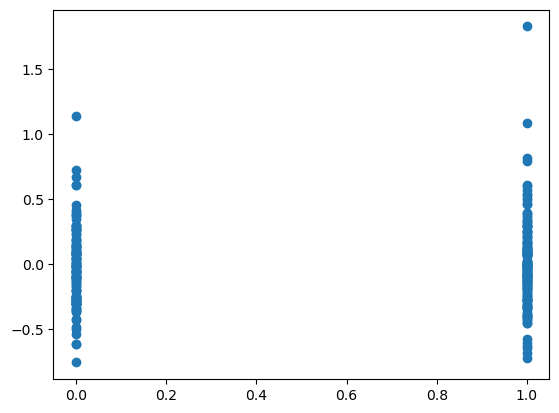

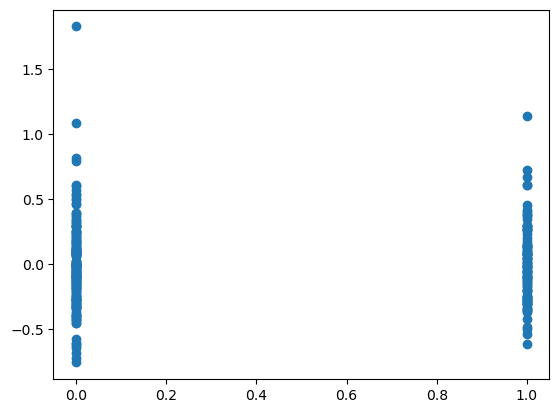

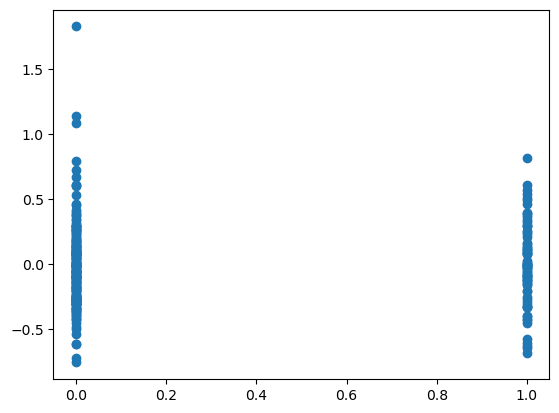

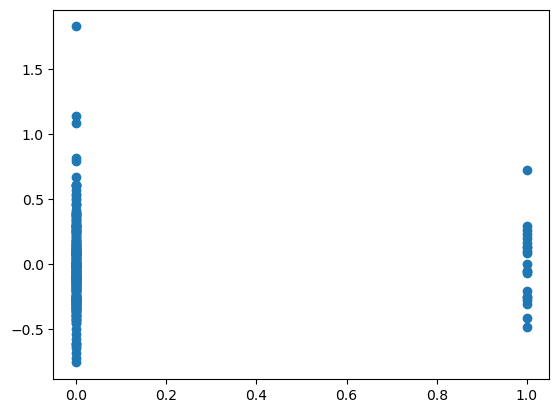

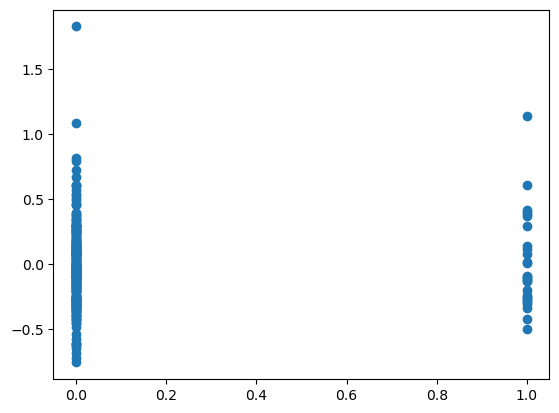

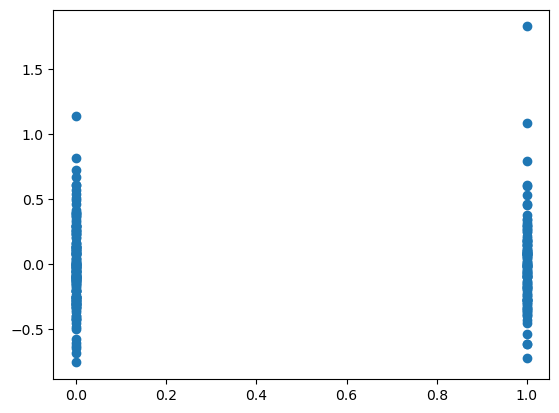

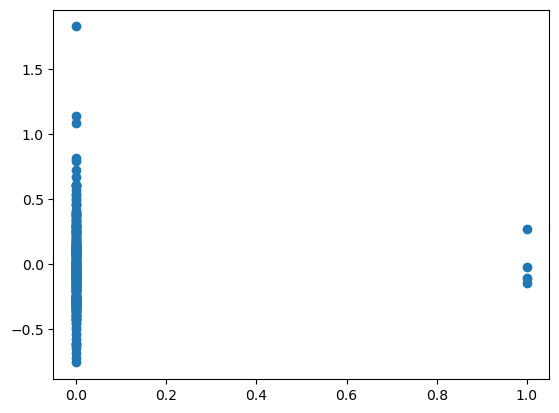

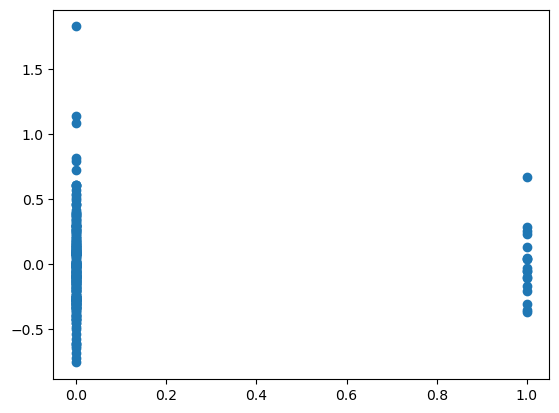

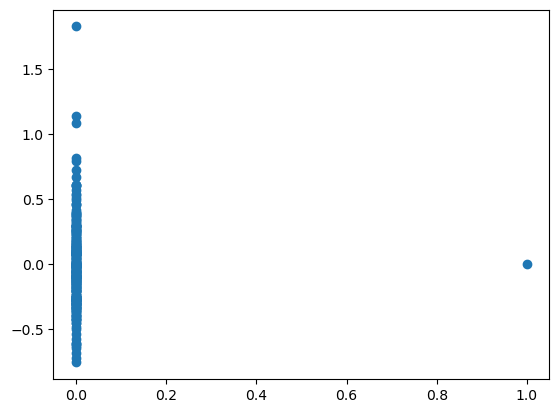

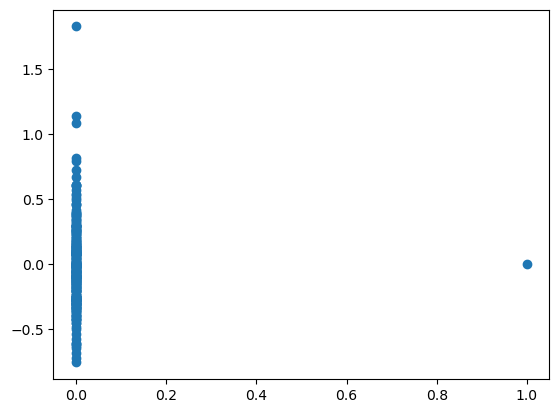

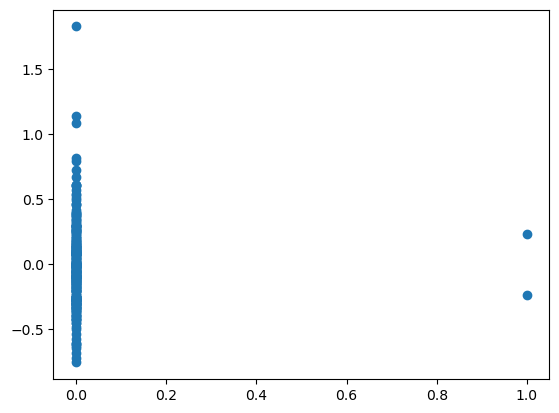

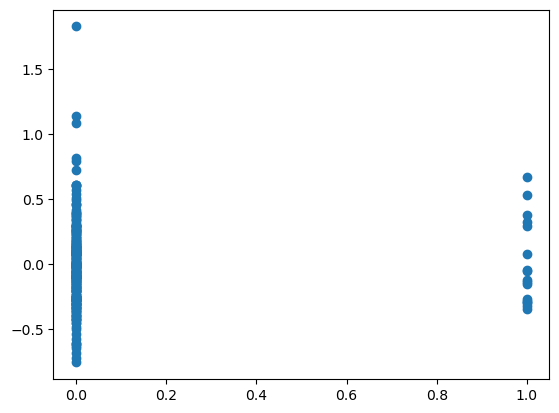

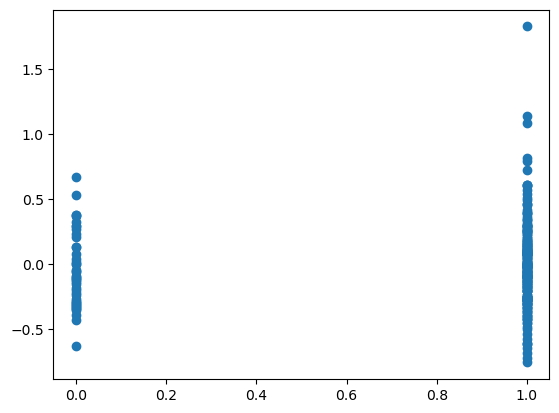

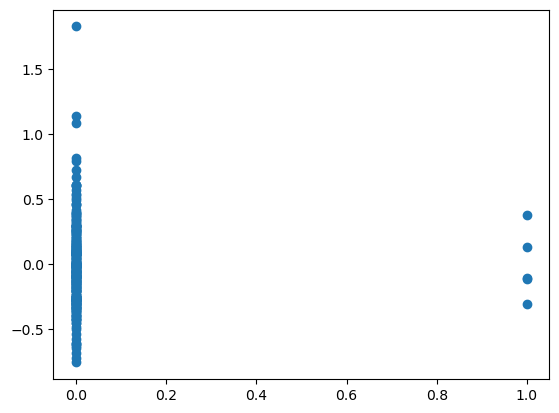

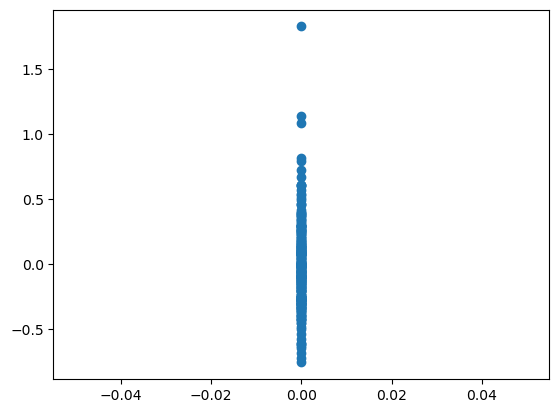

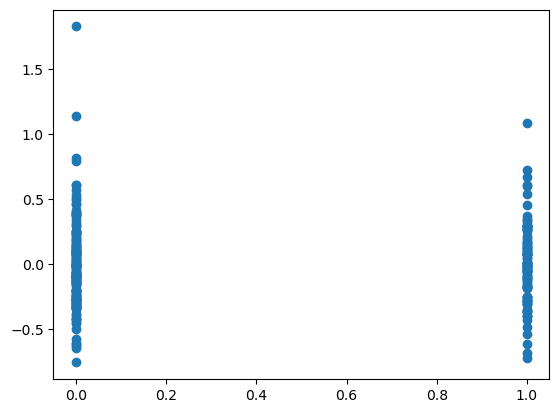

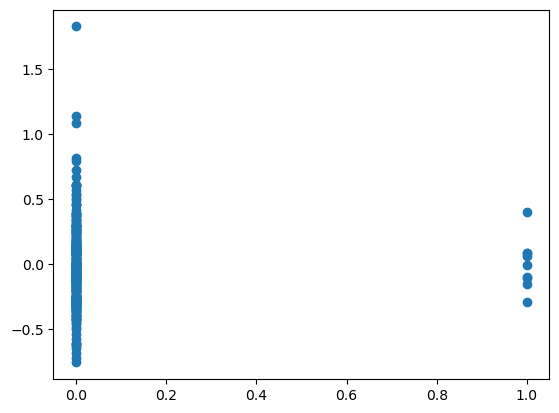

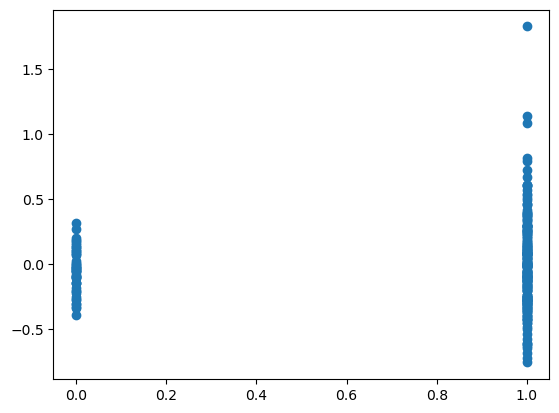

In [46]:
for i in X_train.columns:
    plt.scatter(X_train[i],model_1.resid)
    plt.show()

From the aboves graphs, I conclude that there is no linear relationship between the feature and the residual.

# Normality of residual Q-Q plot 

In [47]:
from scipy import stats

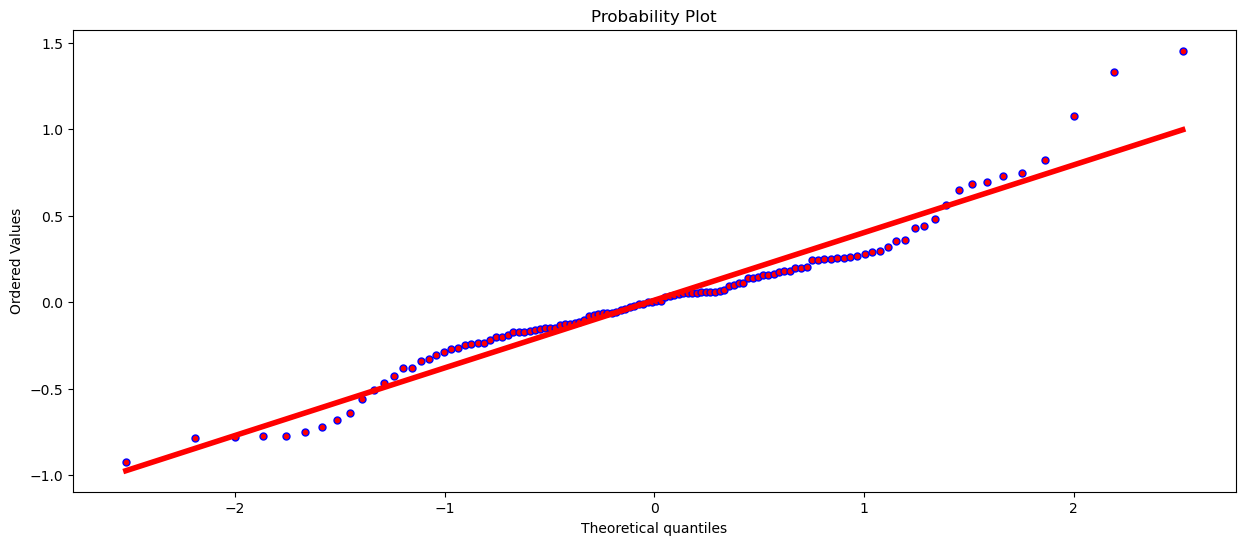

In [48]:
fig,ax=plt.subplots(1,1,figsize=(15,6))
stats.probplot(residual,plot=plt)
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

In [49]:
model_1.resid.mean()

-0.008333096795756525

So from the above result the residual is nearly normally distributed.

# Insiginficent Feature

In [50]:
df_p_value=pd.DataFrame(model_1.pvalues,columns=["P_value"])
df_p_value

,P_value
SlNo,7.181191e-01
Percent_SSC,7.570322e-01
Percent_HSC,1.231021e-01
Percent_Degree,9.997001e-01
Experience_Yrs,9.987325e-04
Percentile_ET,1.447749e-01
Percent_MBA,1.854371e-01
Marks_Projectwork,3.821208e-03
Marks_BOCA,7.416764e-01
Gender_M,7.657294e-01


In [51]:
insigini_feature=list(df_p_value[df_p_value["P_value"]>0.05].index)
insigini_feature

['SlNo',
 'Percent_SSC',
 'Percent_HSC',
 'Percent_Degree',
 'Percentile_ET',
 'Percent_MBA',
 'Marks_BOCA',
 'Gender_M',
 'Board_SSC_Others',
 'Board_HSC_ISC',
 'Board_HSC_Others',
 'Stream_HSC_Commerce',
 'Stream_HSC_Science',
 'Course_Degree_Computer Applications',
 'Course_Degree_Engineering',
 'Entrance_Test_G-MAT',
 'Entrance_Test_G-SAT',
 'Entrance_Test_GCET',
 'Entrance_Test_K-MAT',
 'Entrance_Test_PGCET',
 'Specialization_MBA_Marketing & IB']

# Model_2 without insigini_feature

In [52]:
X_new=X.drop(insigini_feature,axis=1)
y_new=add["Salary"]

In [53]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_new,y_new,test_size=0.3,random_state=1)

In [54]:
model_2=sm.OLS(y_train1,X_train1).fit()
y_pred2=model_2.predict(X_test1)

In [55]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              181.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                   7.10e-112
Time:                        23:24:08   Log-Likelihood:                         -95.660
No. Observations:                 273   AIC:                                      211.3
Df Residuals:                     263   BIC:                                      247.4
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Experience_Yrs                        0.1281      0.032      3.962      0.000       0.064       0.192
Marks_Projectwork                    -0.0212      0.001    -18.317      0.000      -0.023      -0.019
Board_SSC_ICSE                       -0.0650      0.054     -1.195      0.233      -0.172       0.042
Course_Degree_Commerce               -0.0835      0.061     -1.378      0.170      -0.203       0.036
Course_Degree_Management             -0.1741      0.056     -3.118      0.002      -0.284      -0.064
Course_Degree_Others                 -0.2790      0.182     -1.532      0.127      -0.637       0.080
Course_Degree_Science                -0.1897      0.094     -2.018      0.045      -0.375      -0.005
Entrance_Test_MAT                    -0.2945      0.055     -5.376      0.000      -0.402      -0.187
Entrance_Test_XAT                  2.423e-16   3.83e-17      6.330      0.000    1.67e-16    3.18e-16
Specialization_MBA_Marketing & HR    -0.2052      0.044     -4.688      0.000      -0.291      -0.119
Placement_Placed                      2.3171      0.056     41.728      0.000       2.208       2.426
==============================================================================
Omnibus:                       76.754   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.076
Skew:                           1.132   Prob(JB):                     2.29e-64
Kurtosis:                       7.543   Cond. No.                     7.03e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.6e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
model_2_rmse=rmse(y_test1,y_pred2)
model_2_rsquare=model_2.rsquared
model_2_adj_rsquare=model_2.rsquared_adj

In [57]:
model_value2=pd.Series({"Model_Name":"Without Insigini_feature","R-Squared":model_2_rsquare,"Adj. R-Squared":model_2_adj_rsquare,"RMSE":model_2_rmse})
score_card=score_card.append(model_value2,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Base Model,0.891542,0.877648,0.395705
1,Without Insigini_feature,0.873430,0.868617,0.387072


# Model_3 SGD

In [58]:
num=X_new.dtypes
num=list(num[num!="uint8"].index)
df_num=X_new[num]
df_cat=X_new.drop(num,axis=1)
df_num.head()

,Experience_Yrs,Marks_Projectwork
0,0,65
1,1,70
2,0,61
3,0,66
4,1,65


In [59]:
df_cat.head()

,Board_SSC_ICSE,Course_Degree_Commerce,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Entrance_Test_MAT,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Placement_Placed
0,0,0,0,0,1,1,0,1,1
1,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,1,0,0,1
4,0,0,0,0,0,1,0,1,1


# Scaling the feature or indipendent variable

In [60]:
X_scaled = pd.concat([df_num.reset_index(drop=True), df_cat.reset_index(drop=True)], axis = 1)

In [61]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler_ind = StandardScaler()
scaler_ind.fit(X_train_scaled)

StandardScaler()

In [64]:
X_train_scaled = pd.DataFrame(scaler_ind.transform(X_train_scaled),columns=X_train_scaled.columns)

scaler_ind.fit(X_test_scaled)

X_test_scaled = pd.DataFrame(scaler_ind.transform(X_test_scaled),columns=X_test_scaled.columns)

In [65]:
ss = StandardScaler()
ss.fit(np.array(y_train_scaled).reshape((-1,1)))
y_train_scaled = ss.fit_transform(np.array(y_train_scaled).reshape((-1,1)))


ss.fit(np.array(y_test_scaled).reshape((-1,1)))
y_test_scaled = ss.fit_transform(np.array(y_test_scaled).reshape((-1,1)))

In [66]:
from sklearn.linear_model import SGDRegressor
model_3=SGDRegressor()
model_3=model_3.fit(X_train_scaled,y_train_scaled)

In [67]:
y_pred3=ss.inverse_transform(model_3.predict(X_test_scaled).reshape(-1,1))

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
model_3_mse=mean_squared_error(y_test_scaled,y_pred3)
model_3_rmse=np.sqrt(model_3_mse)
model_3_rsquare=r2_score(y_test_scaled,y_pred3)
model_3_adj_rsquare=1-(1-model_3_rsquare)*(len(y_test_scaled)-1)/(len(y_test_scaled)-X_test_scaled.shape[1]-1)

In [70]:
model_value3=pd.Series({"Model_Name":"Model 3 SGD","R-Squared":model_3_rsquare,"Adj. R-Squared":model_3_adj_rsquare,"RMSE":model_3_rmse})
score_card=score_card.append(model_value3,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Base Model,0.891542,0.877648,0.395705
1,Without Insigini_feature,0.873430,0.868617,0.387072
2,Model 3 SGD,0.889789,0.878352,0.331981


# Model_4 with SGD using GridsearchCv

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid=[{"alpha":10.0**-np.arange(1, 7),
           "penalty":["12","l1","elasticnet"],
           "learning_rate":["constant","optimal","invscaling"]}]

reg=GridSearchCV(model_3,param_grid)

reg=reg.fit(X_train_scaled,y_train_scaled)

In [74]:
print("alpha :",reg.best_estimator_.alpha)
print("tol:",reg.best_estimator_.tol)
print("eta0 :",reg.best_estimator_.eta0)
print("learning_rate : ",reg.best_estimator_.learning_rate)

alpha : 1e-05
tol: 0.001
eta0 : 0.01
learning_rate :  constant


In [75]:
model_4_best_param=SGDRegressor(alpha=0.01,tol=0.001,eta0=0.01,learning_rate="constant")
model_4_best_param.fit(X_train_scaled,y_train_scaled)

SGDRegressor(alpha=0.01, learning_rate='constant')

In [76]:
y_pred4=ss.inverse_transform(model_4_best_param.predict(X_test_scaled).reshape(-1,1))

In [77]:
#ss.inverse_transform(model_4_best_param.predict(X_test_scaled).reshape(-1,1))

In [78]:
model_4_mse=mean_squared_error(y_test_scaled,y_pred4)
model_4_rmse=np.sqrt(model_4_mse)
model_4_rsquare=r2_score(y_test_scaled,y_pred4)
model_4_adj_rsquare=1-(1-model_4_rsquare)*(len(y_test_scaled)-1)/(len(y_test_scaled)-X_test_scaled.shape[1]-1)

In [79]:
model_value4=pd.Series({"Model_Name":"Model 4 SGD using gridsearch",
                        "R-Squared":model_4_rsquare,
                        "Adj. R-Squared":model_4_adj_rsquare,
                        "RMSE":model_4_rmse})
score_card=score_card.append(model_value4,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Base Model,0.891542,0.877648,0.395705
1,Without Insigini_feature,0.873430,0.868617,0.387072
2,Model 3 SGD,0.889789,0.878352,0.331981
3,Model 4 SGD using gridsearch,0.884794,0.872838,0.339421


# Forward Feature Selection

In [80]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [81]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2023-08-09 23:24:17] Features: 1/5 -- score: 0.8797053375684563[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2023-08-09 23:24:17] Features: 2/5 -- score: 0.8836160053829607[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-08-09 23:24:17] Features: 3/5 -- score: 0.8867552256277238[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

<Figure size 5000x5000 with 0 Axes>

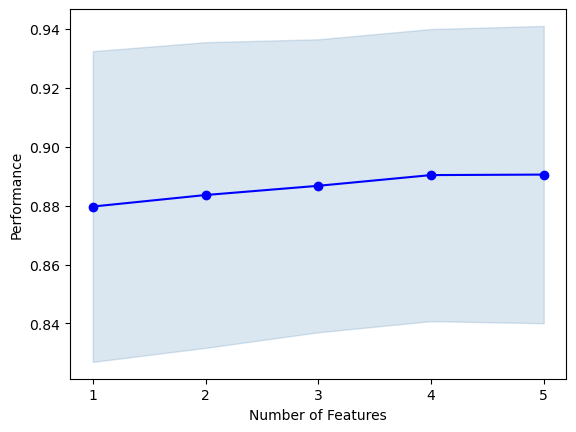

In [82]:
reg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg, k_features = 5, forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train1, y_train1)

from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs
plt.figure(figsize=(50,50))
fig1 = plt_sfs(sfs1.get_metric_dict(), kind= 'std_dev') 
plt.show()

result = pd.DataFrame(sfs1.get_metric_dict()).T
result = result[['feature_idx','avg_score','feature_names']]
imp_vars_forward = list(result.feature_names[result['avg_score'] == max(result.avg_score)])


In [83]:
imp_vars_forward

[('Experience_Yrs',
  'Course_Degree_Management',
  'Entrance_Test_MAT',
  'Specialization_MBA_Marketing & HR',
  'Placement_Placed')]

In [84]:
imp_feat=['Experience_Yrs',
  'Course_Degree_Management',
  'Entrance_Test_MAT',
  'Specialization_MBA_Marketing & HR',
  'Placement_Placed']

In [85]:
X_best=X[imp_feat]
y_best=y

In [86]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X_best,y_best,test_size=0.3,random_state=1)

In [87]:
model_5=sm.OLS(y_train3,X_train3).fit()
y_pred5=model_5.predict(X_test3)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                              98.27
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                    1.52e-58
Time:                        23:24:18   Log-Likelihood:                         -235.63
No. Observations:                 273   AIC:                                      481.3
Df Residuals:                     268   BIC:                                      499.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Experience_Yrs                       -0.0513      0.051     -1.000      0.318      -0.152       0.050
Course_Degree_Management             -0.3277      0.070     -4.709      0.000      -0.465      -0.191
Entrance_Test_MAT                    -1.0076      0.072    -13.974      0.000      -1.150      -0.866
Specialization_MBA_Marketing & HR    -0.3062      0.071     -4.321      0.000      -0.446      -0.167
Placement_Placed                      1.5941      0.073     21.913      0.000       1.451       1.737
==============================================================================
Omnibus:                       12.055   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.452
Skew:                          -0.080   Prob(JB):                     1.80e-06
Kurtosis:                       4.517   Cond. No.                         3.83
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Cond. No.	3.83
the cond No is less than 100 mean there is no multi-colinearity

In [88]:
model_5_rmse=rmse(y_test3,y_pred5)
model_5_rsquare=model_5.rsquared
model_5_adj_rsquare=model_5.rsquared_adj

In [89]:
model_value5=pd.Series({"Model_Name":"Model 5 best feature",
                        "R-Squared":model_5_rsquare,
                        "Adj. R-Squared":model_5_adj_rsquare,
                        "RMSE":model_5_rmse})
score_card=score_card.append(model_value5,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Base Model,0.891542,0.877648,0.395705
1,Without Insigini_feature,0.873430,0.868617,0.387072
2,Model 3 SGD,0.889789,0.878352,0.331981
3,Model 4 SGD using gridsearch,0.884794,0.872838,0.339421
4,Model 5 best feature,0.647076,0.640491,0.579325


# Conclusion

In [90]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Base Model,0.891542,0.877648,0.395705
1,Without Insigini_feature,0.873430,0.868617,0.387072
2,Model 3 SGD,0.889789,0.878352,0.331981
3,Model 4 SGD using gridsearch,0.884794,0.872838,0.339421
4,Model 5 best feature,0.647076,0.640491,0.579325


Model 4 preforming the best model, reason behind the best performace is we tune the hyper perameter so that model become a fit model also scaling the feature impact my model performance. Also from the score card I say the least value of RMSE is in the model 4 and I get best R2 value and Adj R2 value in the model 4.

<Axes: >

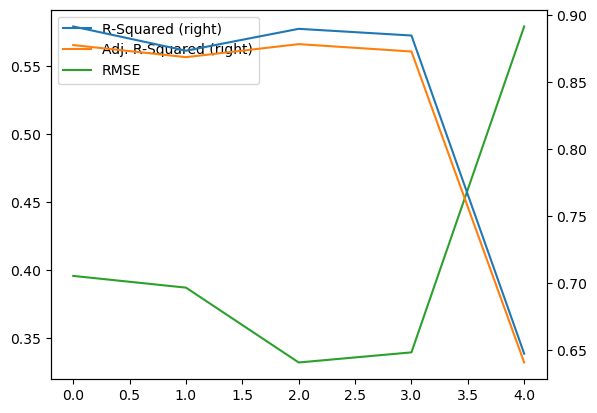

In [91]:
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

The graph shows the performance metrics root mean squared error, 
R-squared and Adjusted R-squared of the models implemented: the X-axis has the model number as given in the table. 
The plot gives a clear picture of the inverse relation of R squared values and the RMSE value, 
the better the R-squared value naturally the lesser is the RMSE value.

Findings suggest that the linear regression with interaction algorithm has the highest accuracy with lowest RMSE.
Finally, it can be concluded that the linear regression with interaction can be used by insurance company to predict charges